<a href="https://colab.research.google.com/github/matiasguzmanp/vit-yoga-82/blob/main/vit_predict_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Transformer on Yoga82

Author: Matías Guzmán Parra

In [ ]:
!git clone https://github.com/matiasguzmanp/vit-yoga-82

Cloning into 'vit-yoga-82'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 65 (delta 20), reused 50 (delta 13), pack-reused 0
Receiving objects: 100% (65/65), 117.45 KiB | 5.87 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
import sys
sys.path.insert(0,'/content/vit-yoga-82')

## Download checkpoint

In [ ]:
!gdown --id 1-042HH5ZvHGLDnfIsEF8Lqcojp57YFZs

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-042HH5ZvHGLDnfIsEF8Lqcojp57YFZs
To: /content/vit_checkpoint_6_20_82.pth
100% 490M/490M [00:04<00:00, 103MB/s]


In [ ]:
!gdown --id 1M2KfEOBx_6p1nP8Mo-cya7jTqwJuI4hI

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1M2KfEOBx_6p1nP8Mo-cya7jTqwJuI4hI
To: /content/vit_checkpoint_6.pth
100% 844M/844M [00:15<00:00, 55.8MB/s]


## Predict with checkpoint

In [ ]:
class config():
  def __init__(self):
    self.chw = (3,128,128)
    self.patch_size = 8
    self.D = 768
    self.n_classes = 6
    self.heads = 12
    self.layers = 12
    self.epochs = 6
    self.lr = 1e-5
    self.batch_size = 32
    self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from ViT.vit import ViT
import torch

weights_path = "./vit_checkpoint_6.pth"
state_dict = torch.load(weights_path)["model_state_dict"]


configuration = config()
model = ViT(configuration)
model.load_state_dict(state_dict)
model.eval()

ViT(
  (mapper): Linear(in_features=192, out_features=768, bias=True)
  (encoder): TransformerEncoder(
    (blocks): ModuleList(
      (0-11): 12 x TransformerBlock(
        (attention): MultiHeadAttention(
          (heads): ModuleList(
            (0-11): 12 x AttentionHead(
              (Q): Linear(in_features=768, out_features=64, bias=True)
              (K): Linear(in_features=768, out_features=64, bias=True)
              (V): Linear(in_features=768, out_features=64, bias=True)
            )
          )
        )
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (l1): Linear(in_features=768, out_features=3072, bias=True)
        (gelu): GELU(approximate='none')
        (l2): Linear(in_features=3072, out_features=768, bias=True)
      )
    )
  )
  (classifier): Linear(in_features=768, out_features=6, bias=True)
)

Let's take some images and see the results

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Text(0.5, 1.0, 'Imagen 3')

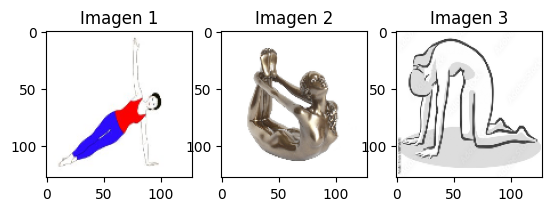

In [ ]:
from PIL import Image
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

def load_image(path):
  img = Image.open(path1)
  transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((128,128))
        ])
  img = transform(img)

path1 = "/content/vit-yoga-82/images/0_16.jpg"
path2 = "/content/vit-yoga-82/images/0_247.jpg"
path3 = "/content/vit-yoga-82/images/1_0_120.jpg"

img1 = load_image(path1)
img2 = load_image(path2)
img3 = load_image(path3)


f, axarr = plt.subplots(1,3)
axarr[0].imshow(img1.permute(1, 2, 0))
axarr[0].set_title("Imagen 1")
axarr[1].imshow(img2.permute(1, 2, 0))
axarr[1].set_title("Imagen 2")
axarr[2].imshow(img3.permute(1, 2, 0))
axarr[2].set_title("Imagen 3")

In [ ]:
def predict(model, img):
  output = model(img.unsqueeze(0).expand(32,-1,-1,-1))
  _, batch_predictions = torch.max(output, dim=1)
  return batch_predictions[0]

In [ ]:
out1 = predict(model, img1)
out2 = predict(model, img2)
out3 = predict(model, img3)

## And we can get the outputs printed

In [ ]:
print(f"La primera imagen corresponde a clase {out1}, la segunda a clase {out2} y la tercera a clase {out3}")

La primera imagen corresponde a clase 3, la segunda a clase 3 y la tercera a clase 3
